### **`Classification Metrics`**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    recall_score,
    precision_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
# load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# spliting the data into Training Set & Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression Model
model = LogisticRegression(max_iter=3500)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

✅ Accuracy = 0.956140350877193
✅ Confussion Metrics = [[39  4]
 [ 1 70]]


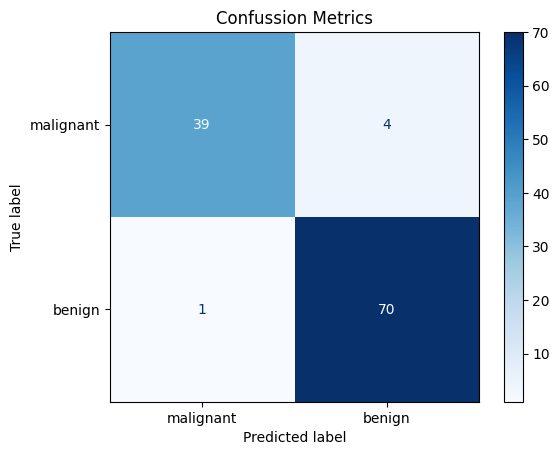

In [18]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy = {acc}")

# Confussion Metrics
cm = confusion_matrix(y_test, y_pred)
print(f"✅ Confussion Metrics = {cm}")

# Displaying the Confussion Metrics
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confussion Metrics")
plt.show()

In [19]:
# Additional Metrics: Precision, Recall, F1 Score
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104


In [20]:
# Full Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


📄 Classification Report:

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [24]:
# Explore Probabilities + Thresholding
y_prob = model.predict_proba(X_test)[:,1]

# Apply Custom Thresold
custom_thresold = 0.3
y_custom = (y_prob >= custom_thresold).astype(int)

print(f"Custom Thresold: {custom_thresold}")
print(f"New F1 Score: {f1_score(y_test, y_pred)}")

Custom Thresold: 0.3
New F1 Score: 0.9655172413793104


Text(0.5, 1.0, 'Precision vs Recall vs Threshold')

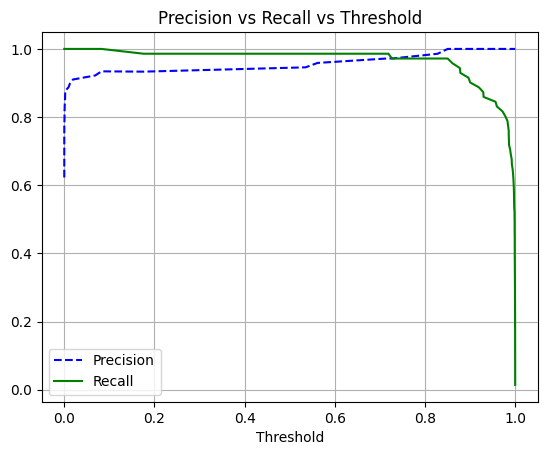

In [26]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.title("Precision vs Recall vs Threshold")
